In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv
import requests
import gmaps
import os
from api_keys import api_key

In [4]:
# read the air pollution file
air_death_df = pd.read_csv('../resources/7.8.20 UCSD Group Project Dataset - death-rates-from-air-pollution.csv')
# read the happiness files
happiness_2015_raw_df = pd.read_csv('../resources/2015_happiness_data.csv')
happiness_2016_raw_df = pd.read_csv('../resources/2016_happiness_data.csv')
happiness_2017_raw_df = pd.read_csv('../resources/2017_happiness_data.csv')

In [6]:
# happiness_2015_raw_df

In [7]:
# Renamed columns
air_death_df = air_death_df.rename(columns={'Entity': 'Country', 'Air pollution (total) (deaths per 100,000)': 'Air Pollution Deaths Per 100k'})
# Dropped un-needed columns
air_death_df2 = air_death_df.drop(['Code', 'Indoor air pollution (deaths per 100,000)', 'Outdoor particulate matter (deaths per 100,000)', 
                         'Outdoor ozone pollution (deaths per 100,000)'], axis=1)
# Reformatted the decimal pointin the air polution column by assigning the column I want to format and then using the 
# .map().format function ont the called column
air_death_df2['Air Pollution Deaths Per 100k'] = air_death_df2['Air Pollution Deaths Per 100k'].map('{:,.2f}'.format)
# Convert string into a float using .astype() function. Ps - this could have been done on the line above as a chain
air_death_df2['Air Pollution Deaths Per 100k'] = air_death_df2['Air Pollution Deaths Per 100k'].astype(float)
# air_death_df2

In [8]:
# Remove data from years 1990-2014
# first set the inde
index_df = air_death_df2.set_index('Year')
# index_df

In [9]:
# Remove data from years 1990-2014
# use .drop() and set the range(1990, 2015)
clean_year_df = index_df.drop(range(1990, 2015), axis=0).drop(2017)
# reset the index
clean_year_df = clean_year_df.reset_index()
clean_year_df.shape # check the shape to see if rows were deleted
# clean_year_df

(462, 3)

In [8]:
clean_year_df.to_csv('air_pol_year_clean.csv')

In [10]:
# Pull the years data 2015 and 2016
air_death_2015 = clean_year_df[clean_year_df['Year'] == 2015]
air_death_2016 = clean_year_df[clean_year_df['Year'] == 2016]
# air_death_2015

In [11]:
air_2015_df = air_death_2015.sort_values('Air Pollution Deaths Per 100k', ascending=False)
air_2015_df = air_2015_df.drop(['Year'], axis=1)
air_2015_df.columns = ['Country', '2015 Air Pollution Deaths Per 100k']
air_2016_df = air_death_2016.sort_values('Air Pollution Deaths Per 100k', ascending=False)
air_2016_df = air_2016_df.drop(['Year'], axis=1)
air_2016_df.columns = ['Country', '2016 Air Pollution Deaths Per 100k']
# air_2016_df

In [16]:
#create one datafram with the columns: country, 2015 deaths, 2016 deaths. 
air_quality_df = air_2015_df.merge(air_2016_df, on = 'Country', how = 'inner')
air_quality_df

Country  2015 Air Pollution Deaths Per 100k  \
0            Papua New Guinea                              254.73   
1    Central African Republic                              205.85   
2                     Oceania                              203.30   
3             Solomon Islands                              192.32   
4                 Afghanistan                              191.80   
..                        ...                                 ...   
226               Australasia                               10.99   
227                   Iceland                               10.74   
228                    Sweden                                9.85   
229               New Zealand                                9.38   
230                   Finland                                8.69   

     2016 Air Pollution Deaths Per 100k  
0                                249.27  
1                                202.46  
2                                198.84  
3                                189.48  
4                                186.67  
..                                  ...  
226                               10.29  
227                                9.92  
228                                9.28  
229                                8.65  
230                                8.40  

[231 rows x 3 columns]

In [17]:
air_quality_df.to_csv('jay_pollution_deaths.csv')

In [18]:
happiness_2015_df = happiness_2015_raw_df[['Country', 'Happiness Rank', 'Happiness Score']]
happiness_2015_df.columns = ['Country', '2015 Happiness Rank', '2015 Happiness Score']
happiness_2016_df = happiness_2016_raw_df[['Country', 'Happiness Rank', 'Happiness Score']]
happiness_2016_df.columns = ['Country', '2016 Happiness Rank', '2016 Happiness Score']

# happiness_2015_df

In [19]:
happiness_2015_2016_df = happiness_2015_df.merge(happiness_2016_df, on='Country', how='inner')
# happiness_2015_2016_df

In [20]:
pollution_deaths_to_happiness_df = happiness_2015_2016_df.merge(air_quality_df, on='Country', how='inner')
pollution_deaths_to_happiness_df

Country  2015 Happiness Rank  2015 Happiness Score  \
0    Switzerland                    1                 7.587   
1        Iceland                    2                 7.561   
2        Denmark                    3                 7.527   
3         Norway                    4                 7.522   
4         Canada                    5                 7.427   
..           ...                  ...                   ...   
139       Rwanda                  154                 3.465   
140        Benin                  155                 3.340   
141        Syria                  156                 3.006   
142      Burundi                  157                 2.905   
143         Togo                  158                 2.839   

     2016 Happiness Rank  2016 Happiness Score  \
0                      2                 7.509   
1                      3                 7.501   
2                      1                 7.526   
3                      4                 7.498   
4                      6                 7.404   
..                   ...                   ...   
139                  152                 3.515   
140                  153                 3.484   
141                  156                 3.069   
142                  157                 2.905   
143                  155                 3.303   

     2015 Air Pollution Deaths Per 100k  2016 Air Pollution Deaths Per 100k  
0                                 12.92                               11.98  
1                                 10.74                                9.92  
2                                 19.89                               19.32  
3                                 11.47                               10.86  
4                                 12.22                               11.00  
..                                  ...                                 ...  
139                              100.56                               98.50  
140                              119.29                              115.81  
141                               65.14                               64.84  
142                              146.91                              144.36  
143                              121.15                              118.16  

[144 rows x 7 columns]

In [21]:
pollution_deaths_to_happiness_df.to_csv('pollution_deaths_to_happiness.csv')

In [22]:
#create a heatmap with deaths using api calls
countries = pollution_deaths_to_happiness_df['Country']
# countries

In [29]:
# slice dataframes with just target countries

In [23]:
# do a function def() to plot all the scatter plots
# do a regression line
# get a ptest
# do subplots

In [66]:
def regress_func(x_axis, y_axis, xlabel, ylabel, table_name, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope * x_axis + intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.annotate(f'pval = {pvalue}', (10, 3.0) ,color="red") #(125, 3.0), fontsize=15
    plt.annotate(f'r-squared = {rvalue*rvalue}', (10, 2.6) ,color="red") #(125, 3.0), fontsize=15
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    print(f"The P-value is {pvalue} and R-squared value {rvalue*rvalue}")
    plt.savefig(fig_name)

The P-value is 2.487985031450844e-30 and R-squared value 0.6036555236444642


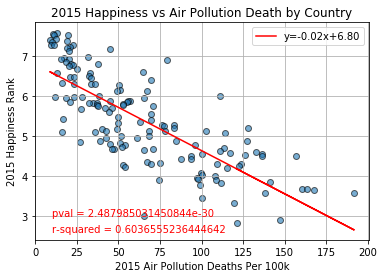

In [67]:
regress_func(pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k'],
             pollution_deaths_to_happiness_df['2015 Happiness Score'],
             '2015 Air Pollution Deaths Per 100k',
             '2015 Happiness Rank',
             '2015 Happiness vs Air Pollution Death by Country',
             'fig_happines_airdeath2015'
            )

In [68]:
# Write analysis

The P-value is 1.981341515174934e-32 and R-squared value 0.6296289779059633


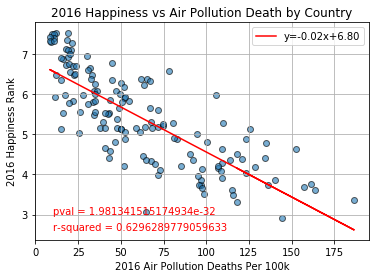

In [69]:
regress_func(pollution_deaths_to_happiness_df['2016 Air Pollution Deaths Per 100k'],
             pollution_deaths_to_happiness_df['2016 Happiness Score'],
             '2016 Air Pollution Deaths Per 100k',
             '2016 Happiness Rank',
             '2016 Happiness vs Air Pollution Death by Country',
             'fig_happines_airdeath2016'
            )

In [41]:
# Write analysis

In [37]:
# Setup data for heat map
# pull lat and long for each country
# create a loop
# create a new column in the dataframe
pollution_deaths_to_happiness_df['Latitude'] = ''
pollution_deaths_to_happiness_df['Longitude'] = ''

for index, row in pollution_deaths_to_happiness_df.iterrows():
    country = row['Country']
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={api_key}"
    request = requests.get(url).json()
    pollution_deaths_to_happiness_df.loc[index, 'Latitude'] = request['results'][0]['geometry']['location']['lat']
    pollution_deaths_to_happiness_df.loc[index, 'Longitude'] = request['results'][0]['geometry']['location']['lng']

pollution_deaths_to_happiness_df

Country  2015 Happiness Rank  2015 Happiness Score  \
0    Switzerland                    1                 7.587   
1        Iceland                    2                 7.561   
2        Denmark                    3                 7.527   
3         Norway                    4                 7.522   
4         Canada                    5                 7.427   
..           ...                  ...                   ...   
139       Rwanda                  154                 3.465   
140        Benin                  155                 3.340   
141        Syria                  156                 3.006   
142      Burundi                  157                 2.905   
143         Togo                  158                 2.839   

     2016 Happiness Rank  2016 Happiness Score  \
0                      2                 7.509   
1                      3                 7.501   
2                      1                 7.526   
3                      4                 7.498   
4                      6                 7.404   
..                   ...                   ...   
139                  152                 3.515   
140                  153                 3.484   
141                  156                 3.069   
142                  157                 2.905   
143                  155                 3.303   

     2015 Air Pollution Deaths Per 100k  2016 Air Pollution Deaths Per 100k  \
0                                 12.92                               11.98   
1                                 10.74                                9.92   
2                                 19.89                               19.32   
3                                 11.47                               10.86   
4                                 12.22                               11.00   
..                                  ...                                 ...   
139                              100.56                               98.50   
140                              119.29                              115.81   
141                               65.14                               64.84   
142                              146.91                              144.36   
143                              121.15                              118.16   

    Latitude Longitude  
0    46.8182   8.22751  
1    64.9631  -19.0208  
2    56.2639   9.50178  
3     60.472   8.46895  
4    56.1304  -106.347  
..       ...       ...  
139 -1.94028   29.8739  
140  9.30769   2.31583  
141  34.8021   38.9968  
142 -3.37306   29.9189  
143  36.4198  -98.7648  

[144 rows x 9 columns]

In [42]:
pollution_deaths_to_happiness_df.to_csv('pollution_cities_lat_lon.csv', index=False)
pollution_deaths_to_happiness_df
# heatmap_df = pd.read_csv('pollution_deaths_lat_lon.csv')
# heatmap_df

Country  2015 Happiness Rank  2015 Happiness Score  \
0    Switzerland                    1                 7.587   
1        Iceland                    2                 7.561   
2        Denmark                    3                 7.527   
3         Norway                    4                 7.522   
4         Canada                    5                 7.427   
..           ...                  ...                   ...   
139       Rwanda                  154                 3.465   
140        Benin                  155                 3.340   
141        Syria                  156                 3.006   
142      Burundi                  157                 2.905   
143         Togo                  158                 2.839   

     2016 Happiness Rank  2016 Happiness Score  \
0                      2                 7.509   
1                      3                 7.501   
2                      1                 7.526   
3                      4                 7.498   
4                      6                 7.404   
..                   ...                   ...   
139                  152                 3.515   
140                  153                 3.484   
141                  156                 3.069   
142                  157                 2.905   
143                  155                 3.303   

     2015 Air Pollution Deaths Per 100k  2016 Air Pollution Deaths Per 100k  \
0                                 12.92                               11.98   
1                                 10.74                                9.92   
2                                 19.89                               19.32   
3                                 11.47                               10.86   
4                                 12.22                               11.00   
..                                  ...                                 ...   
139                              100.56                               98.50   
140                              119.29                              115.81   
141                               65.14                               64.84   
142                              146.91                              144.36   
143                              121.15                              118.16   

    Latitude Longitude  
0    46.8182   8.22751  
1    64.9631  -19.0208  
2    56.2639   9.50178  
3     60.472   8.46895  
4    56.1304  -106.347  
..       ...       ...  
139 -1.94028   29.8739  
140  9.30769   2.31583  
141  34.8021   38.9968  
142 -3.37306   29.9189  
143  36.4198  -98.7648  

[144 rows x 9 columns]

In [41]:

# Store latitiude and longitude in locations variable
locations = pollution_deaths_to_happiness_df[['Latitude', 'Longitude']]
# Store humidty data as the weight
deaths = pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k']
# Configure gmap
gmaps.configure(api_key=api_key)
figure = gmaps.figure(zoom_level=1.5, center=(0,0))
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=deaths, 
                                 dissipating=False, point_radius=3,
                                 max_intensity=max(pollution_deaths_to_happiness_df['2015 Air Pollution Deaths Per 100k']))
                                 
# # Add heat map layer to fig with .add_layer() function
figure.add_layer(heat_layer)
# # Display figure
figure

Figure(layout=FigureLayout(height='420px'))